In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif,SelectPercentile,SequentialFeatureSelector,RFE,RFECV,SelectFromModel
from sklearn import feature_selection
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [3]:
drink = pd.read_csv('/Drink_Dataset.csv')
drink.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#checking for null values
drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#no null values, checking for duplicate rows
drink[drink.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [6]:
#240 duplicate rows, lets drop them
drink.drop_duplicates(inplace=True)

In [7]:
drink.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


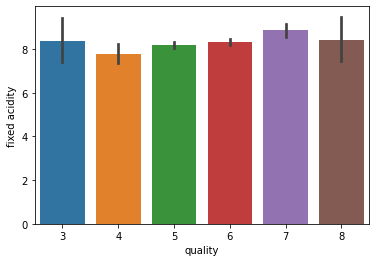

In [8]:
#duplicate rows have been dropped
#lets plot response variable by predictors

fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'fixed acidity', data = drink)

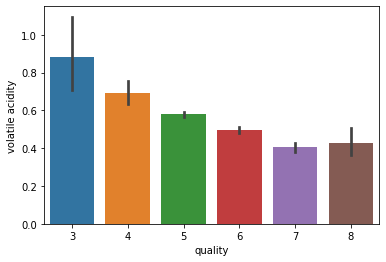

In [9]:
#it seems no relation between quality and fixed acidity
#high variance in quality = 3 & 8 and low variance in the middle

fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'volatile acidity', data = drink)

In [10]:
#by decreasing volatile acidity we see a increasing pattern in quality
#high variance in quality = 3

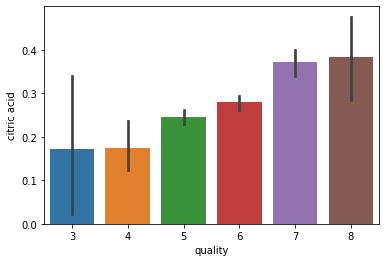

In [11]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'citric acid', data = drink)

In [12]:
#increasing quality by increasing citric acid
#high variance in quality = 3, 8

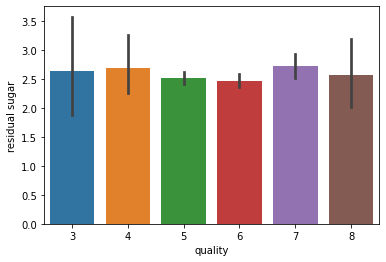

In [13]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'residual sugar', data = drink)

In [14]:
#it seems no relation between residual sugar and fixed acidity
#high variance in quality = 3, 4, 8 and low variance in the middle

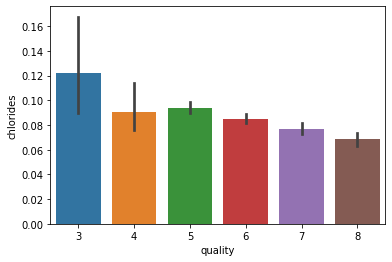

In [15]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'chlorides', data = drink)

In [16]:
#by decreasing chlorides we see a increasing pattern in quality
#high variance in quality = 3

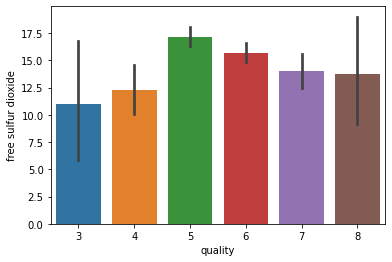

In [17]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = drink)

In [18]:
#there is a relation between free sulfur dioxide and quality but its not linear
#high variance in quality = 3, 8

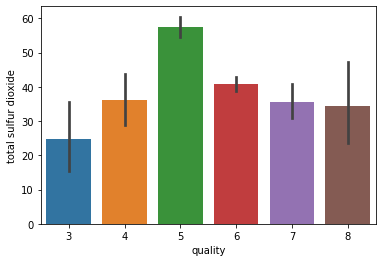

In [19]:

fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = drink)

In [20]:
#there is a relation between free sulfur dioxide and quality but its not linear
#high variance in quality = 3, 4, 8

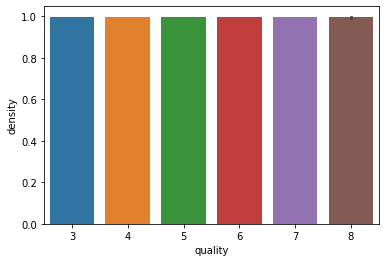

In [21]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'density', data = drink)

In [22]:
drink[["density"]].describe()

,density
count,1359.000000
mean,0.996709
std,0.001869
min,0.990070
25%,0.995600
50%,0.996700
75%,0.997820
max,1.003690


In [23]:
#density min is 0.99, so we define a new variable like (density-0.99) * 1000
drink["densityComperasion"] = (drink["density"]-0.99) * 1000
drink.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,densityComperasion
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7.8
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,6.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,7.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,8.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,7.8


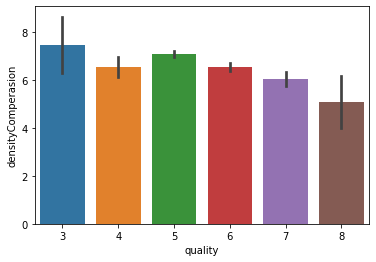

In [24]:
#new column created to comperasion densities
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'densityComperasion', data = drink)

In [25]:
#quality and densityComperasion have realtion, increasing densityComperasion can increase quality
#high variance in quality = 3, 8

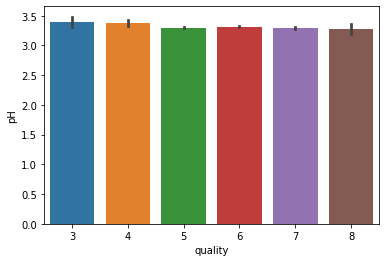

In [26]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'pH', data = drink)

In [27]:
#lets define a new variable to comperasion ph better
drink[["pH"]].describe()

,pH
count,1359.000000
mean,3.309787
std,0.155036
min,2.740000
25%,3.210000
50%,3.310000
75%,3.400000
max,4.010000


In [28]:
#min is 2.74, so lets defien a new variable like (ph-2.74)*10
drink["pHComperasion"] = (drink["pH"] - 2.74) * 10
drink.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,densityComperasion,pHComperasion
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7.8,7.7
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,6.8,4.6
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,7.0,5.2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,8.0,4.2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,7.8,7.7


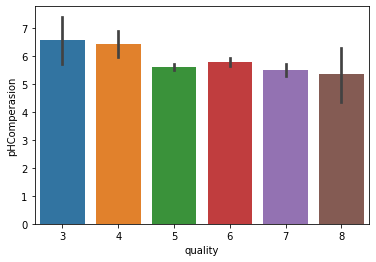

In [29]:
#new column created to comperasion densities
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'pHComperasion', data = drink)

In [30]:
#it seems there is a little downward pattern by pHComperasion
#high variance in quality = 3, 8

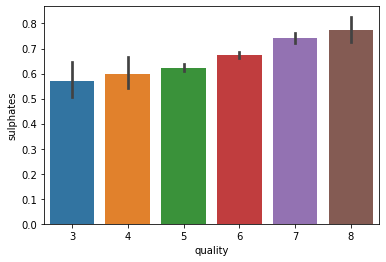

In [31]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'sulphates', data = drink)

In [32]:
#by increasing sulphates we see a increasing pattern in quality
#high variance in quality = 3, 4, 8

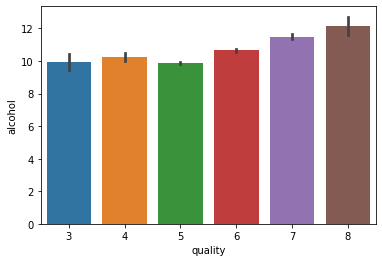

In [33]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'alcohol', data = drink)

In [34]:
#by increasing alcohol we see a increasing pattern in quality

In [35]:
#drop density and pH rows and preparing for training
drink1=drink.drop(['density','pH'], axis='columns')
drink1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality,densityComperasion,pHComperasion
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,5,7.8,7.7
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8,5,6.8,4.6
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8,5,7.0,5.2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8,6,8.0,4.2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.56,9.4,5,7.8,7.7


In [36]:
bins = (2, 5.5, 8)
group_names = ['bad', 'good']
drink1['quality'] = pd.cut(drink1['quality'], bins = bins, labels = group_names)
drink1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality,densityComperasion,pHComperasion
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,bad,7.8,7.7
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8,bad,6.8,4.6
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8,bad,7.0,5.2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8,good,8.0,4.2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.56,9.4,bad,7.8,7.7


In [37]:
label_quality = LabelEncoder()
drink1['quality'] = label_quality.fit_transform(drink1['quality'])
drink1['quality'].value_counts()

1    719
0    640
Name: quality, dtype: int64

In [38]:
X = drink1.drop('quality', axis = 1)
y = drink1['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)

In [39]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [40]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
#score = logisticRegr.score(X_test, y_test)
pred_logres = logisticRegr.predict(X_test)
#print(score)
#print(classification_report(y_test, pred_logres))

y_pred = logisticRegr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


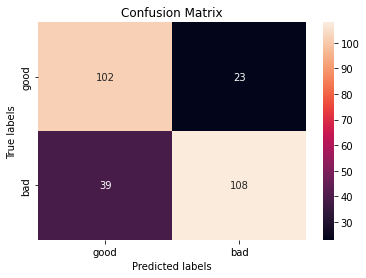

In [41]:
cm = (confusion_matrix(y_test, pred_logres))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['good', 'bad']); 
ax.yaxis.set_ticklabels(['good', 'bad']);

In [42]:
logisticRegr.coef_

repReg = pd.DataFrame()
repReg.insert(0,"features",X.columns)
repReg.insert(1,"coef",abs(logisticRegr.coef_.flatten()))
print(repReg.sort_values(by='coef',ascending=False))

                features      coef
8                alcohol  0.978997
6   total sulfur dioxide  0.554364
1       volatile acidity  0.546115
7              sulphates  0.467124
2            citric acid  0.230819
5    free sulfur dioxide  0.199027
4              chlorides  0.163906
0          fixed acidity  0.120693
10         pHComperasion  0.072380
3         residual sugar  0.022965
9     densityComperasion  0.015421


In [43]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                 feature         VIF
0          fixed acidity  182.128549
1       volatile acidity   16.439427
2            citric acid    8.866208
3         residual sugar    7.141456
4              chlorides    5.961549
5    free sulfur dioxide    6.469125
6   total sulfur dioxide    6.133908
7              sulphates   23.312328
8                alcohol  192.541000
9     densityComperasion   81.566470
10         pHComperasion   46.300526


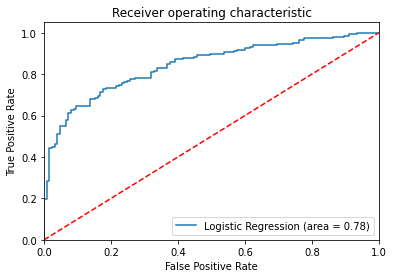

In [44]:
logit_roc_auc = roc_auc_score(y_test, logisticRegr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
scores = cross_val_score(logisticRegr, X, y, cv=10)
scores.mean()

In [46]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
pred_lda = LDA.predict(X_test)
#print(classification_report(y_test, pred_lda))

y_pred = LDA.predict(X_test)
print('Accuracy of LDA classifier on test set: {:.2f}'.format(LDA.score(X_test, y_test)))

Accuracy of LDA classifier on test set: 0.75


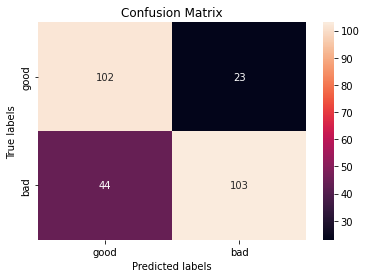

In [47]:
cm = (confusion_matrix(y_test, pred_lda))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['good', 'bad']); 
ax.yaxis.set_ticklabels(['good', 'bad']);

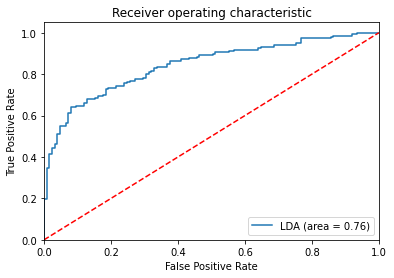

In [48]:
lda_roc_auc = roc_auc_score(y_test, LDA.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LDA.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LDA (area = %0.2f)' % lda_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [49]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)
pred_qda = QDA.predict(X_test)
#print(classification_report(y_test, pred_qda))

y_pred = QDA.predict(X_test)
print('Accuracy of QDA classifier on test set: {:.2f}'.format(QDA.score(X_test, y_test)))

Accuracy of QDA classifier on test set: 0.73


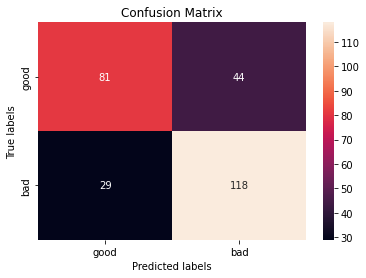

In [50]:
cm = (confusion_matrix(y_test, pred_qda))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['good', 'bad']); 
ax.yaxis.set_ticklabels(['good', 'bad']);

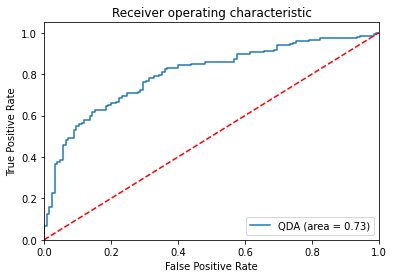

In [51]:
qda_roc_auc = roc_auc_score(y_test, QDA.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, QDA.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='QDA (area = %0.2f)' % qda_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

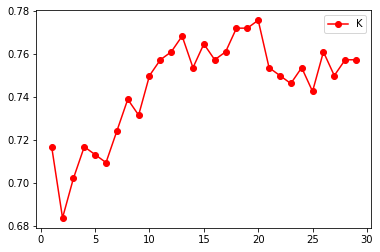

In [52]:
test_accuracyB = [] 
for k in range (1, 30): 
    neigh = KNeighborsClassifier(n_neighbors=k) 
    neigh.fit(X_train, y_train) 
    pred_knn = neigh.predict(X_test) 
    test_accuracyB.append(accuracy_score(y_test, pred_knn)) 
 
plt.plot(np.array(range(1, 30)) , test_accuracyB, color = "red", marker = "o", label = "K") 
plt.legend() 
plt.show()

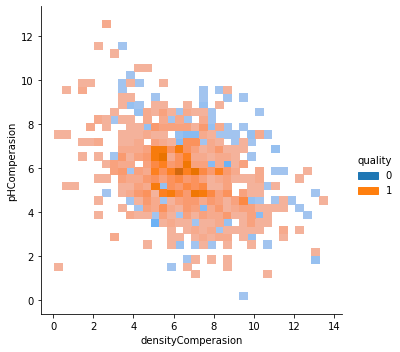

In [53]:
#pHComperasion and densityComperasion have low coefficients
#we can check relations between this 2 feature and quality in 1 plot
sns.displot(data=drink1, x="densityComperasion",y ="pHComperasion", hue="quality")

In [54]:
#it seems we can draw a circle with x=7 and y=6 center, in circle higher chance of quality = 1
#so we define a new variable, like z = (x-7)^2 + (y-6)^2, linear relation between z and x, z and y can show themselves
#in coefficients of x and y, so we just need to describe 2 new varible like x^2 and y^2
drink2 = drink1.copy()
drink2["extfeature1"] = drink2["densityComperasion"]**2
drink2["extfeature2"] = drink2["pHComperasion"]**2
drink2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality,densityComperasion,pHComperasion,extfeature1,extfeature2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,0,7.8,7.7,60.84,59.29
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8,0,6.8,4.6,46.24,21.16
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8,0,7.0,5.2,49.00,27.04
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8,1,8.0,4.2,64.00,17.64
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.56,9.4,0,7.8,7.7,60.84,59.29


In [55]:
#lets create a new model and check its score
X2 = drink2.drop('quality', axis = 1)
y2 = drink2['quality']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 9)
X2_train = sc.fit_transform(X2_train)
X2_test = sc.fit_transform(X2_test)

logisticRegr2 = LogisticRegression()
logisticRegr2.fit(X2_train, y2_train)
pred_logres2 = logisticRegr2.predict(X2_test)

#print(classification_report(y2_test, pred_logres2))

y_pred = logisticRegr2.predict(X2_test)
print('Accuracy of logistic regression classifier with new featcures on test set: {:.2f}'.format(logisticRegr2.score(X2_test, y2_test)))

Accuracy of logistic regression classifier with new featcures on test set: 0.77


In [56]:
logisticRegr2.coef_

repReg2 = pd.DataFrame()
repReg2.insert(0,"features",X2.columns)
repReg2.insert(1,"coef",abs(logisticRegr2.coef_.flatten()))
print(repReg2.sort_values(by='coef',ascending=False))

                features      coef
8                alcohol  0.968561
6   total sulfur dioxide  0.557041
1       volatile acidity  0.536250
7              sulphates  0.478142
12           extfeature2  0.262656
11           extfeature1  0.261802
9     densityComperasion  0.248294
2            citric acid  0.221128
5    free sulfur dioxide  0.196050
10         pHComperasion  0.181043
4              chlorides  0.161906
0          fixed acidity  0.111339
3         residual sugar  0.004965


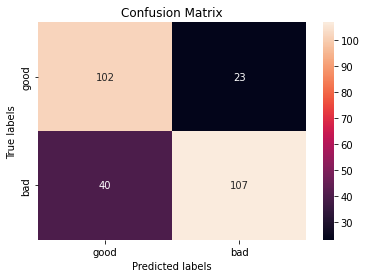

In [57]:
cm = (confusion_matrix(y2_test, pred_logres2))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['good', 'bad']); 
ax.yaxis.set_ticklabels(['good', 'bad']);

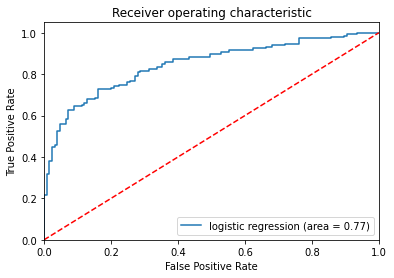

In [58]:
reg2_roc_auc = roc_auc_score(y2_test, logisticRegr2.predict(X2_test))
fpr, tpr, thresholds = roc_curve(y2_test, logisticRegr2.predict_proba(X2_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='logistic regression (area = %0.2f)' % reg2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [59]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   sulphates             1359 non-null   float64
 8   alcohol               1359 non-null   float64
 9   densityComperasion    1359 non-null   float64
 10  pHComperasion         1359 non-null   float64
 11  extfeature1           1359 non-null   float64
 12  extfeature2           1359 non-null   float64
dtypes: float64(13)
memory usage: 180.9 KB


In [60]:
#our model accuriacy increased, so we can add some other features, then choose p best of them
#start with adding x^2 of features
drink3=drink1.copy()
drink3["fixed acidity^2"]=drink1["fixed acidity"]**2
drink3["volatile acidity^2"]=drink1["volatile acidity"]**2
drink3["citric acid^2"]=drink1["citric acid"]**2
drink3["residual sugar^2"]=drink1["residual sugar"]**2
drink3["chlorides^2"]=drink1["chlorides"]**2
drink3["free sulfur dioxide^2"]=drink1["free sulfur dioxide"]**2
drink3["total sulfur dioxide^2"]=drink1["total sulfur dioxide"]**2
drink3["sulphates^2"]=drink1["sulphates"]**2
drink3["alcohol^2"]=drink1["alcohol"]**2
drink3["densityComperasion^2"]=drink1["densityComperasion"]**2
drink3["pHComperasion^2"]=drink1["pHComperasion"]**2

In [61]:
#lets create a new model and check its score
X3 = drink3.drop('quality', axis = 1)
y3 = drink3['quality']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 9)
X3_train = sc.fit_transform(X3_train)
X3_test = sc.fit_transform(X3_test)

logisticRegr3 = LogisticRegression()
logisticRegr3.fit(X3_train, y3_train)

pred_logres3 = logisticRegr3.predict(X3_test)

#print(classification_report(y3_test, pred_logres3))

y_pred = logisticRegr3.predict(X3_test)
print('Accuracy of logistic regression classifier with new featcures on test set: {:.2f}'.format(logisticRegr3.score(X3_test, y3_test)))



Accuracy of logistic regression classifier with new featcures on test set: 0.77


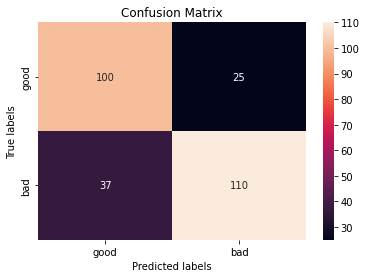

In [62]:
cm = (confusion_matrix(y3_test, pred_logres3))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['good', 'bad']); 
ax.yaxis.set_ticklabels(['good', 'bad']);

#print(confusion_matrix(y3_test, pred_logres3))

In [63]:
logisticRegr3.coef_

repReg3 = pd.DataFrame()
repReg3.insert(0,"features",X3.columns)
repReg3.insert(1,"coef",abs(logisticRegr3.coef_.flatten()))
print(repReg2.sort_values(by='coef',ascending=False))

                features      coef
8                alcohol  0.968561
6   total sulfur dioxide  0.557041
1       volatile acidity  0.536250
7              sulphates  0.478142
12           extfeature2  0.262656
11           extfeature1  0.261802
9     densityComperasion  0.248294
2            citric acid  0.221128
5    free sulfur dioxide  0.196050
10         pHComperasion  0.181043
4              chlorides  0.161906
0          fixed acidity  0.111339
3         residual sugar  0.004965


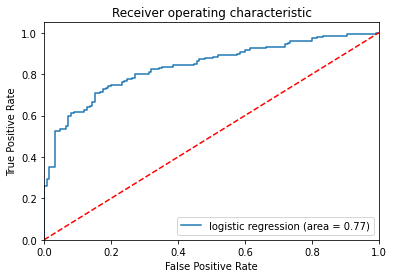

In [64]:
reg3_roc_auc = roc_auc_score(y3_test, logisticRegr3.predict(X3_test))
fpr, tpr, thresholds = roc_curve(y3_test, logisticRegr3.predict_proba(X3_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='logistic regression (area = %0.2f)' % reg3_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [65]:
X3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fixed acidity           1359 non-null   float64
 1   volatile acidity        1359 non-null   float64
 2   citric acid             1359 non-null   float64
 3   residual sugar          1359 non-null   float64
 4   chlorides               1359 non-null   float64
 5   free sulfur dioxide     1359 non-null   float64
 6   total sulfur dioxide    1359 non-null   float64
 7   sulphates               1359 non-null   float64
 8   alcohol                 1359 non-null   float64
 9   densityComperasion      1359 non-null   float64
 10  pHComperasion           1359 non-null   float64
 11  fixed acidity^2         1359 non-null   float64
 12  volatile acidity^2      1359 non-null   float64
 13  citric acid^2           1359 non-null   float64
 14  residual sugar^2        1359 non-null   

In [66]:
#now lets choose meaningful features with feature selection methods
feature_selector=SelectKBest(chi2,k=22)

X4 = feature_selector.fit_transform(X3, y3)
X4.shape


(1359, 22)

In [67]:
feature_selector.get_feature_names_out(input_features=None)

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'sulphates', 'alcohol',
       'densityComperasion', 'pHComperasion', 'fixed acidity^2',
       'volatile acidity^2', 'citric acid^2', 'residual sugar^2',
       'chlorides^2', 'free sulfur dioxide^2', 'total sulfur dioxide^2',
       'sulphates^2', 'alcohol^2', 'densityComperasion^2',
       'pHComperasion^2'], dtype=object)

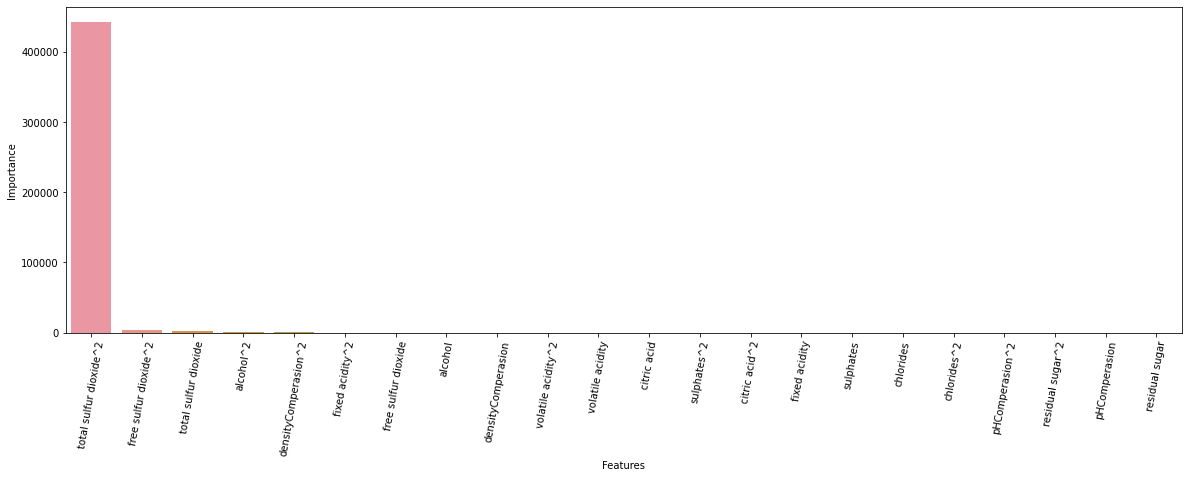

In [68]:
feature_cols=feature_selector.get_feature_names_out(input_features=None)
plot_df=pd.DataFrame({'Features':feature_cols,'Importance':feature_selector.scores_}).sort_values('Importance',ascending=False)
plt.figure(figsize=(20,6))
sns.barplot(data=plot_df,x='Features',y='Importance');
plt.xticks(rotation=80);

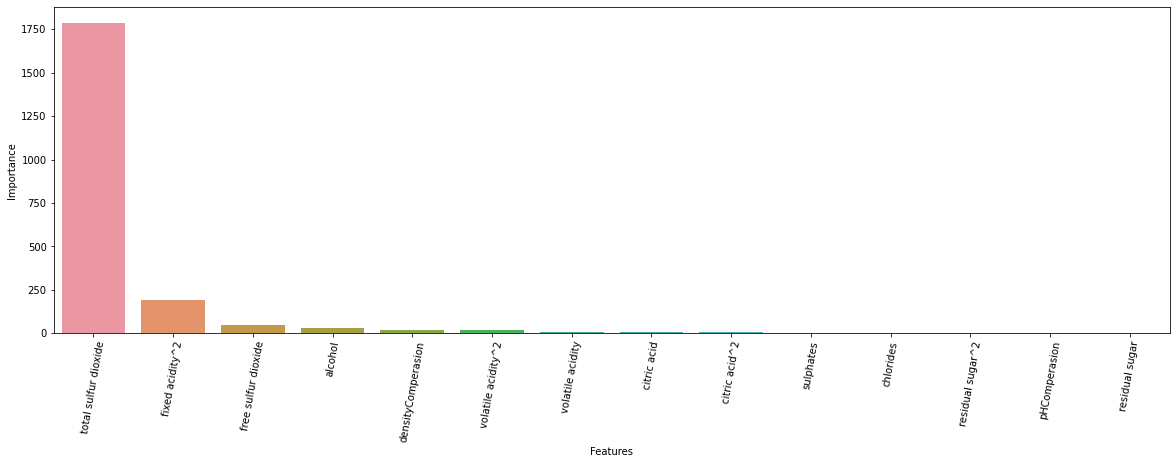

In [69]:
importance_of_featrues = (feature_selector.get_feature_names_out(input_features=None))[1:15]

plot_df=pd.DataFrame({'Features':importance_of_featrues,'Importance':feature_selector.scores_[1:15]}).sort_values('Importance',ascending=False)
plt.figure(figsize=(20,6))
sns.barplot(data=plot_df,x='Features',y='Importance');
plt.xticks(rotation=80);

In [70]:
drink.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,densityComperasion,pHComperasion
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7.8,7.7
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,6.8,4.6
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,7.0,5.2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,8.0,4.2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,7.8,7.7


In [71]:
drink4=drink3.copy()
drink4["alcohol^3"]=drink4["alcohol"]**3
drink4["total sulfur dioxide^3"]=drink4["total sulfur dioxide"]**3
drink4["alcohol * total sulfur dioxide"]=drink4["alcohol"] * drink4["total sulfur dioxide"]

drink4["fixed acidity^3"]=drink4["fixed acidity"]**3
drink4["volatile acidity^3"]=drink4["volatile acidity"]**3
drink4["citric acid^3"]=drink4["citric acid"]**3
drink4["residual sugar^3"]=drink4["residual sugar"]**3
drink4["chlorides^3"]=drink4["chlorides"]**3
drink4["free sulfur dioxide^3"]=drink4["free sulfur dioxide"]**3
drink4["sulphates^3"]=drink4["sulphates"]**3
drink4["densityComperasion^3"]=drink4["densityComperasion"]**3
drink4["pHComperasion^3"]=drink4["pHComperasion"]**3


In [72]:
#lets create a new model and check its score
X4 = drink4.drop('quality', axis = 1)
y4 = drink4['quality']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.2, random_state = 9)
X4_train = sc.fit_transform(X4_train)
X4_test = sc.fit_transform(X4_test)

logisticRegr4 = LogisticRegression()
logisticRegr4.fit(X4_train, y4_train)

pred_logres4 = logisticRegr4.predict(X4_test)

#print(classification_report(y4_test, pred_logres4))
y_pred = logisticRegr4.predict(X4_test)
print('Accuracy of logistic regression classifier with new featcures on test set: {:.2f}'.format(logisticRegr4.score(X4_test, y4_test)))

Accuracy of logistic regression classifier with new featcures on test set: 0.76


In [73]:
drink4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fixed acidity                   1359 non-null   float64
 1   volatile acidity                1359 non-null   float64
 2   citric acid                     1359 non-null   float64
 3   residual sugar                  1359 non-null   float64
 4   chlorides                       1359 non-null   float64
 5   free sulfur dioxide             1359 non-null   float64
 6   total sulfur dioxide            1359 non-null   float64
 7   sulphates                       1359 non-null   float64
 8   alcohol                         1359 non-null   float64
 9   quality                         1359 non-null   int64  
 10  densityComperasion              1359 non-null   float64
 11  pHComperasion                   1359 non-null   float64
 12  fixed acidity^2                 13

In [74]:
X5 = pd.DataFrame()
X5["alcohol"] = drink1["alcohol"]
y5=drink1["quality"]
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size = 0.2, random_state = 9)
X5_train = sc.fit_transform(X5_train)
X5_test = sc.fit_transform(X5_test)

logisticRegr5 = LogisticRegression()
logisticRegr5.fit(X5_train, y5_train)

pred_logres5 = logisticRegr5.predict(X5_test)

print(classification_report(y5_test, pred_logres5))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73       125
           1       0.78      0.69      0.74       147

    accuracy                           0.73       272
   macro avg       0.73      0.73      0.73       272
weighted avg       0.74      0.73      0.73       272



In [75]:
logisticRegr5.coef_

array([[1.11860302]])

In [76]:
X6 = pd.DataFrame()
X6["alcohol"] = drink1["alcohol"]
X6["alcohol^2"] = drink1["alcohol"]**2
y6=drink1["quality"]
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size = 0.2, random_state = 9)
X6_train = sc.fit_transform(X6_train)
X6_test = sc.fit_transform(X6_test)

logisticRegr6 = LogisticRegression()
logisticRegr6.fit(X6_train, y6_train)

pred_logres6 = logisticRegr6.predict(X6_test)

print(classification_report(y6_test, pred_logres6))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73       125
           1       0.78      0.69      0.74       147

    accuracy                           0.73       272
   macro avg       0.73      0.73      0.73       272
weighted avg       0.74      0.73      0.73       272



In [77]:
logisticRegr6.coef_

array([[1.09886447, 0.02050402]])

In [78]:
poly = PolynomialFeatures(2)
poly.fit_transform(X5)
poly.get_feature_names_out(X5.columns)

array(['1', 'alcohol', 'alcohol^2'], dtype=object)

In [79]:
poly = PolynomialFeatures(2)
X6 = pd.DataFrame(poly.fit_transform(X), columns = poly.get_feature_names_out(X.columns))
X6.head()

,1,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,...,sulphates^2,sulphates alcohol,sulphates densityComperasion,sulphates pHComperasion,alcohol^2,alcohol densityComperasion,alcohol pHComperasion,densityComperasion^2,densityComperasion pHComperasion,pHComperasion^2
0,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4,...,0.3136,5.264,4.368,4.312,88.36,73.32,72.38,60.84,60.06,59.29
1,1.0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8,...,0.4624,6.664,4.624,3.128,96.04,66.64,45.08,46.24,31.28,21.16
2,1.0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8,...,0.4225,6.370,4.550,3.380,96.04,68.60,50.96,49.00,36.40,27.04
3,1.0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8,...,0.3364,5.684,4.640,2.436,96.04,78.40,41.16,64.00,33.60,17.64
4,1.0,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.56,9.4,...,0.3136,5.264,4.368,4.312,88.36,73.32,72.38,60.84,60.06,59.29


In [80]:
X6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 78 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   1                                         1359 non-null   float64
 1   fixed acidity                             1359 non-null   float64
 2   volatile acidity                          1359 non-null   float64
 3   citric acid                               1359 non-null   float64
 4   residual sugar                            1359 non-null   float64
 5   chlorides                                 1359 non-null   float64
 6   free sulfur dioxide                       1359 non-null   float64
 7   total sulfur dioxide                      1359 non-null   float64
 8   sulphates                                 1359 non-null   float64
 9   alcohol                                   1359 non-null   float64
 10  densityComperasion                  

In [ ]:
sfs_forward = SequentialFeatureSelector(
    logisticRegr6, n_features_to_select=5, direction="forward"
).fit(X6, y6)

In [83]:
sfs_forward.get_feature_names_out()

array(['volatile acidity sulphates',
       'volatile acidity densityComperasion', 'chlorides alcohol',
       'sulphates^2', 'sulphates alcohol'], dtype=object)

In [84]:
X7 = pd.DataFrame()
X8 = sfs_forward.transform(X6)
X7 = pd.DataFrame(sfs_forward.transform(X6), columns = sfs_forward.get_feature_names_out())
#X8=X8.drop('1',axis='1')

In [85]:
y7 = y6.copy()
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size = 0.2, random_state = 9)
X7_train = sc.fit_transform(X7_train)
X7_test = sc.fit_transform(X7_test)

logisticRegr7 = LogisticRegression()
logisticRegr7.fit(X7_train, y7_train)

pred_logres7 = logisticRegr7.predict(X7_test)

print(classification_report(y7_test, pred_logres7))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       125
           1       0.81      0.69      0.75       147

    accuracy                           0.75       272
   macro avg       0.75      0.75      0.75       272
weighted avg       0.76      0.75      0.75       272



In [86]:
print(confusion_matrix(y7_test, pred_logres7))

[[102  23]
 [ 46 101]]


In [87]:
scores = cross_val_score(logisticRegr7, X7, y7, cv=5)
scores.mean()

0.7461336010418927

In [ ]:
scores2 = cross_val_score(logisticRegr2, X2, y2, cv=5)
scores2.mean()

In [89]:
vif_data = pd.DataFrame()
vif_data["feature"] = X7.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X7.values, i)
                          for i in range(len(X7.columns))]
  
print(vif_data)

                               feature        VIF
0           volatile acidity sulphates  25.401374
1  volatile acidity densityComperasion  12.856046
2                    chlorides alcohol   5.780141
3                          sulphates^2   9.946207
4                    sulphates alcohol  15.325321


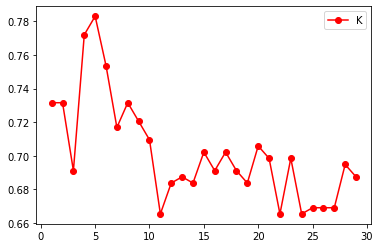

In [108]:
test_accuracy_tree = [] 
for k in range (1, 30): 
    tree_clf = tree.DecisionTreeClassifier(max_depth = k)
    tree_clf = tree_clf.fit(X_train, y_train)
    pred_tree = tree_clf.predict(X_test)
    test_accuracy_tree.append(accuracy_score(y_test, pred_tree)) 
 
plt.plot(np.array(range(1, 30)) , test_accuracy_tree, color = "red", marker = "o", label = "K") 
plt.legend() 
plt.show()

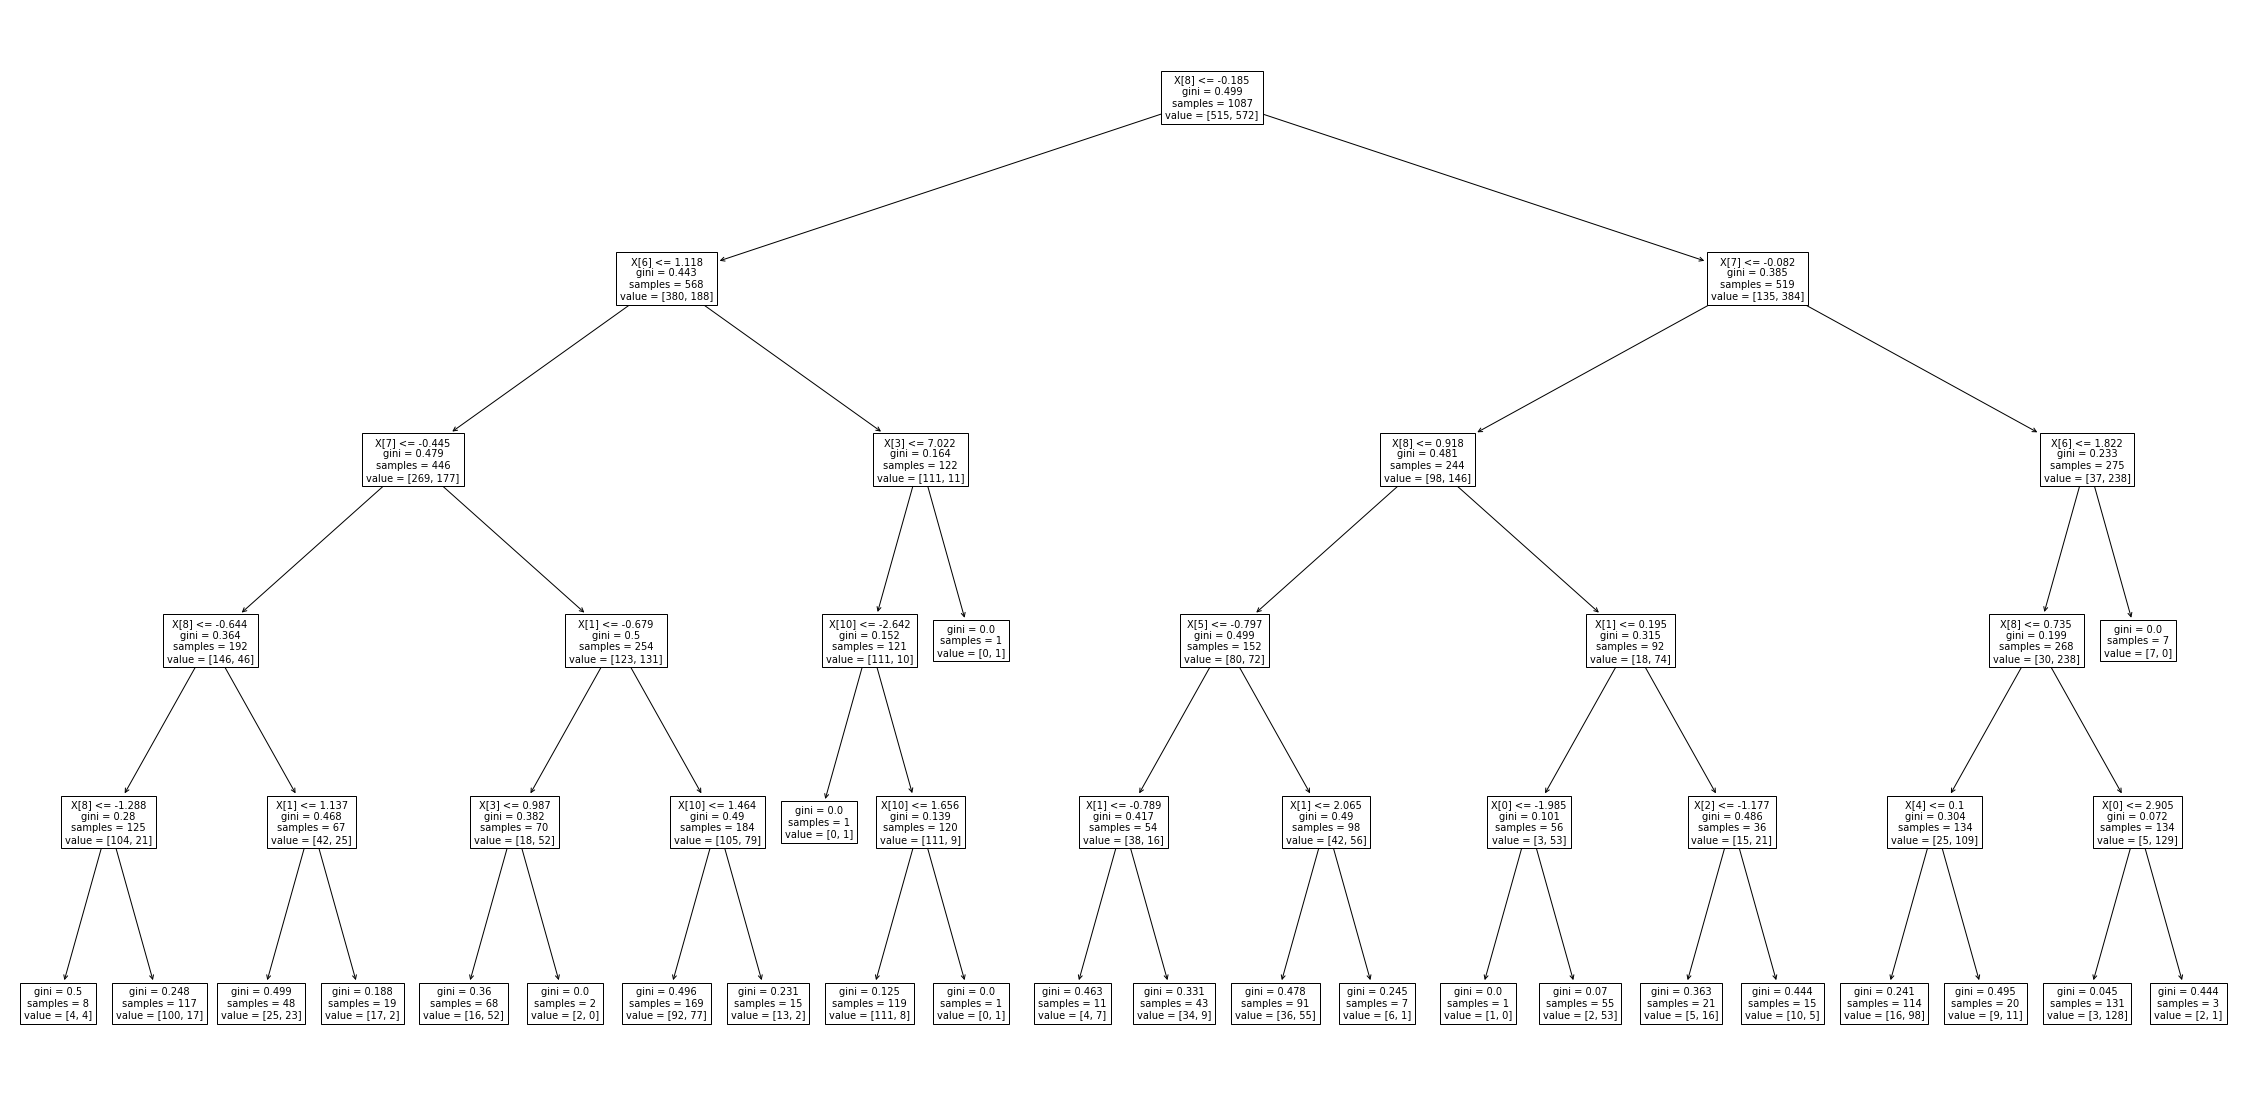

In [123]:
# plotting decision tree with lenght 5
tree_clf = tree.DecisionTreeClassifier(max_depth = 5)
tree_clf = tree_clf.fit(X_train, y_train)
pred_tree = tree_clf.predict(X_test)
tree.plot_tree(tree_clf)
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

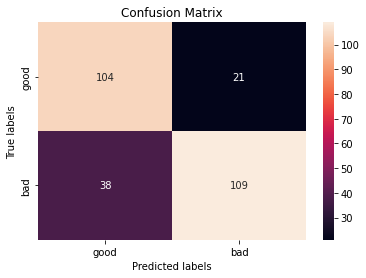

In [127]:
cm = (confusion_matrix(y_test, pred_tree))
plt.rcParams["figure.figsize"] = (6,4)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['good', 'bad']); 
ax.yaxis.set_ticklabels(['good', 'bad']);

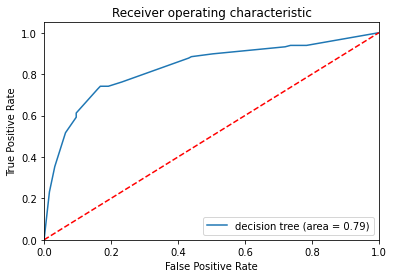

In [128]:
tree_roc_auc = roc_auc_score(y_test, tree_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tree_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='decision tree (area = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [139]:
random_forest_clf = RandomForestClassifier(max_depth = 3)
random_forest_clf = random_forest_clf.fit(X_train, y_train)
pred_random_forest = random_forest_clf.predict(X_test)

print(classification_report(y_test, pred_random_forest))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       125
           1       0.80      0.74      0.77       147

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272



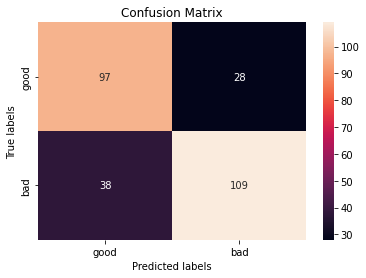

In [140]:
cm = (confusion_matrix(y_test, pred_random_forest))
plt.rcParams["figure.figsize"] = (6,4)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['good', 'bad']); 
ax.yaxis.set_ticklabels(['good', 'bad']);

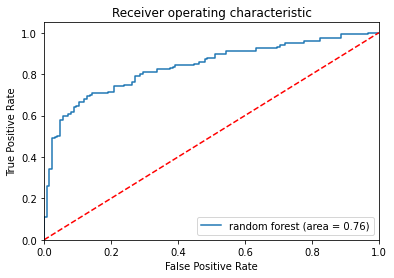

In [141]:
random_forest_roc_auc = roc_auc_score(y_test, random_forest_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, random_forest_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='random forest (area = %0.2f)' % random_forest_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [148]:
svm_clf_linear = svm.SVC(kernel='linear')
svm_clf_linear = svm_clf_linear.fit(X_train, y_train)
pred_svm_linear = svm_clf_linear.predict(X_test)

print(classification_report(y_test, pred_svm_linear))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       125
           1       0.83      0.70      0.76       147

    accuracy                           0.76       272
   macro avg       0.77      0.77      0.76       272
weighted avg       0.77      0.76      0.76       272



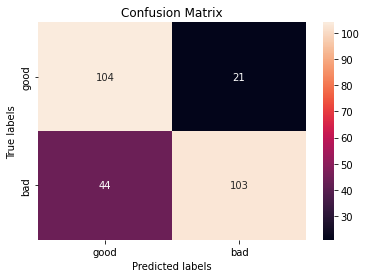

In [149]:
cm = (confusion_matrix(y_test, pred_svm_linear))
plt.rcParams["figure.figsize"] = (6,4)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['good', 'bad']); 
ax.yaxis.set_ticklabels(['good', 'bad']);

In [150]:
svm_clf_poly = svm.SVC(kernel='poly')
svm_clf_poly = svm_clf_poly.fit(X_train, y_train)
pred_svm_poly = svm_clf_poly.predict(X_test)

print(classification_report(y_test, pred_svm_poly))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       125
           1       0.80      0.78      0.79       147

    accuracy                           0.78       272
   macro avg       0.78      0.78      0.78       272
weighted avg       0.78      0.78      0.78       272



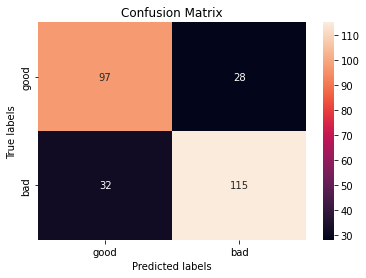

In [151]:
cm = (confusion_matrix(y_test, pred_svm_poly))
plt.rcParams["figure.figsize"] = (6,4)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['good', 'bad']); 
ax.yaxis.set_ticklabels(['good', 'bad']);

In [152]:
svm_clf_rbf = svm.SVC(kernel='rbf')
svm_clf_rbf = svm_clf_rbf.fit(X_train, y_train)
pred_svm_rbf = svm_clf_rbf.predict(X_test)

print(classification_report(y_test, pred_svm_rbf))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       125
           1       0.81      0.76      0.78       147

    accuracy                           0.77       272
   macro avg       0.77      0.77      0.77       272
weighted avg       0.77      0.77      0.77       272



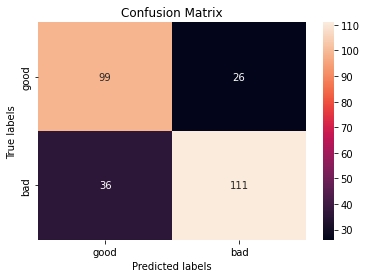

In [153]:
cm = (confusion_matrix(y_test, pred_svm_rbf))
plt.rcParams["figure.figsize"] = (6,4)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['good', 'bad']); 
ax.yaxis.set_ticklabels(['good', 'bad']);